<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning-cnns/blob/main/cnn_implementation_preenchido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Networks - Implementation

Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`tf.keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`tf.keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`tf.keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.




### 1. Preparing the input data

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train[0]

5

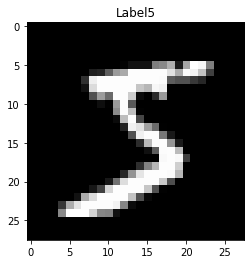

In [7]:
import matplotlib.pyplot as plt

IDX=0
plt.imshow(X_train[IDX], cmap='gray')
plt.title("Label" + str(y_train[IDX]))
plt.show()

Now, let's normalize the data using standardization:

In [8]:
x_mean = X_train.mean()
x_mean

33.318421449829934

In [9]:
x_std = X_train.std()
x_std

78.56748998339798

In [10]:
X_train_norm = (X_train-x_mean)/x_std

In [11]:
X_train_norm.mean()

-3.064638490070051e-17

In [12]:
X_train_norm.std()

0.9999999999999998

In [13]:
X_test.std()

79.17246322228644

In [14]:
X_test_norm = (X_test-x_mean)/x_std

In [15]:
X_test_norm.mean()

0.0060177948928480576

In [16]:
X_test_norm.std()

1.0077000453879372

In [17]:
#X_test_norm[0]

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [19]:
#del model

In [20]:
model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(400, activation='relu'),
                    Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [23]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1889 - accuracy: 0.9428 - val_loss: 0.1099 - val_accuracy: 0.9650
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9731 - val_loss: 0.0866 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0933 - val_accuracy: 0.9744
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0863 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0830 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0867 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 0.0878 - val_accuracy:

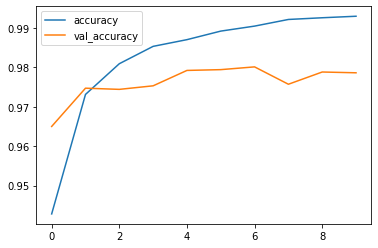

In [24]:
import pandas as pd
df=pd.DataFrame(hist.history)
df[['accuracy', 'val_accuracy']].plot()

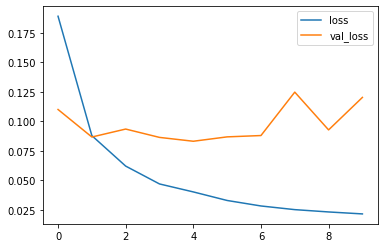

In [25]:
df[['loss', 'val_loss']].plot()

### 3. Extending to CNNs


Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units


#### 3.1 CNN - First Intuitions

In [26]:
from tensorflow.keras.layers import Conv2D

In [27]:
X_train[0].shape

(28, 28)

In [28]:
conv = Conv2D(1, kernel_size=(3, 3))

In [29]:
x=X_train_norm[0].reshape(1, 28, 28, 1)

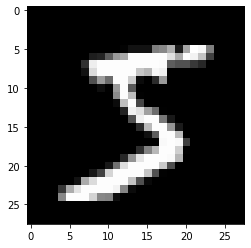

In [30]:
plt.imshow(X_train_norm[0], cmap='gray')

In [31]:
conv.weights

[]

In [32]:
new_x = conv(x)

In [33]:
new_x=new_x.numpy()

In [34]:
new_x=new_x.reshape(26, 26)

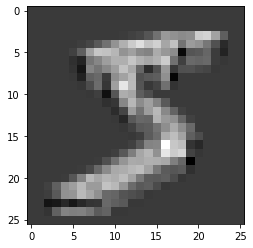

In [35]:
plt.imshow(new_x, cmap='gray')

#### 3.2 One Conv-Layer

In [36]:
from tensorflow.keras.layers import Conv2D

model = Sequential([
                    Conv2D(6, 
                           kernel_size=(3,3), 
                           input_shape=(28, 28, 1)),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
flatten_1 (Flatten)          (None, 4056)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               486840    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 500,010
Trainable params: 500,010
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [39]:
X_train_norm=X_train_norm.reshape(60000, 28, 28, 1)
X_test_norm=X_test_norm.reshape(-1, 28, 28, 1)

In [40]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1969 - accuracy: 0.9398 - val_loss: 0.1175 - val_accuracy: 0.9622
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0935 - accuracy: 0.9715 - val_loss: 0.0846 - val_accuracy: 0.9745
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.0935 - val_accuracy: 0.9723
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9843 - val_loss: 0.0903 - val_accuracy: 0.9749
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.0983 - val_accuracy: 0.9749


#### 3.3 Two Conv-Layer + Maxpooling

And now, let's finish the architecture:

In [41]:
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Conv2D

model = Sequential([
                    Conv2D(6, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'),
                    MaxPool2D(),
                    Conv2D(16, kernel_size=(3,3), activation='relu'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [43]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [44]:
hist = model.fit(X_train_norm, 
          y_train, 
          validation_data=(X_test_norm, y_test), 
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1632 - accuracy: 0.9506 - val_loss: 0.0687 - val_accuracy: 0.9786
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0740 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0354 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - accuracy: 0.9896 - val_loss: 0.0353 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0577 - val_accuracy: 0.9822


In [45]:
model.save('best_model.h5')

### 4. Visualizing predictions

Finally, let's visualize some predictions:

In [46]:
x=X_test_norm[0].reshape(1, 28, 28, 1)

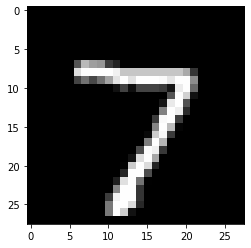

In [47]:
plt.imshow(x.reshape(28, 28), cmap='gray')

In [48]:
pred = model.predict(x)

In [49]:
pred

array([[3.9376326e-07, 3.0660453e-06, 3.5256580e-05, 9.5730302e-06,
        1.3245681e-06, 1.3147310e-07, 1.3568918e-09, 9.9994922e-01,
        8.3411857e-07, 2.1138348e-07]], dtype=float32)

In [50]:
idx = pred.argmax()
idx

7

In [51]:
pred[0][idx]

0.9999492

In [52]:
y_test[0]

7

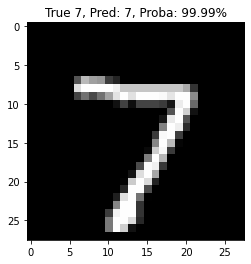

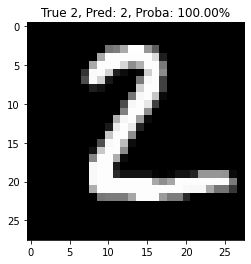

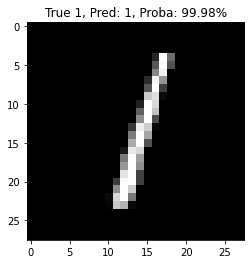

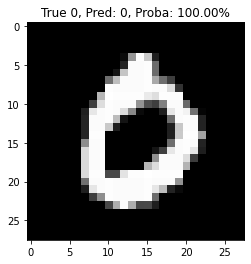

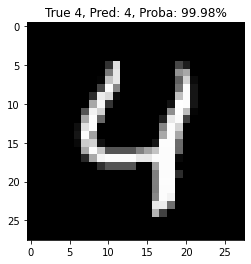

In [53]:
for idx in range(5):
    x=X_test_norm[idx].reshape(1, 28, 28, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    pred = model.predict(x)
    pred_class = pred.argmax()
    plt.title(f'True {y_test[idx]}, Pred: {pred_class}, Proba: {pred[0][pred_class]*100:.2f}%')
    plt.show()


### 5. (Bonus) Visualizing Conv Filters

In [54]:
conv_layer = model.layers[0]

In [55]:
#conv_layer.weights

In [56]:
x=X_train_norm[0].reshape(1, 28, 28, 1)

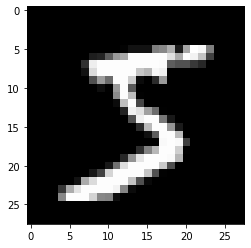

In [57]:
plt.imshow(x.reshape(28,28), cmap='gray')

In [58]:
conv_layer?

In [59]:
output_imgs = conv_layer(x)

In [60]:
output_imgs.shape

TensorShape([1, 26, 26, 6])

In [61]:
#output_img

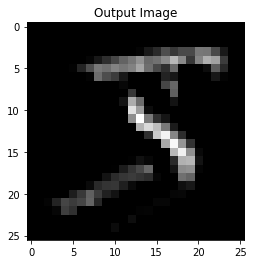

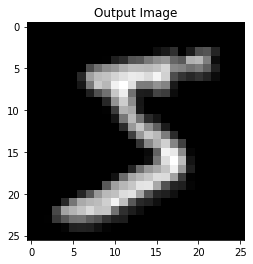

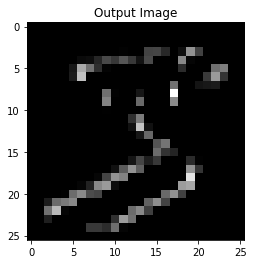

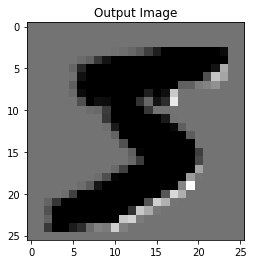

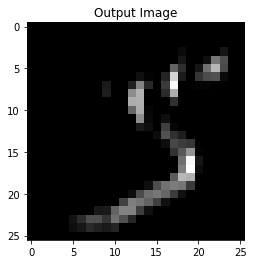

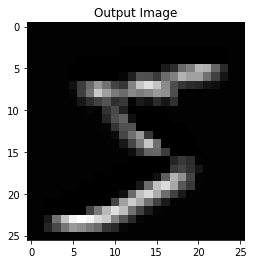

In [63]:
for idx in range(6):
    img=output_imgs[:, :, :, idx].numpy().reshape(26,26)
    plt.imshow(img, cmap='gray')
    plt.title('Output Image')
    plt.show()